## Calculating the Return of Indices

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 1st of January 2000 until today.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb

In [2]:
indices = ["^DJI", "^GSPC", "^IXIC"]

data = pd.DataFrame()

for index in indices:
    data[index] = wb.DataReader(index, data_source="yahoo", start='2000-1-1')["Adj Close"]
    
data

,^DJI,^GSPC,^IXIC
Date,,,
1999-12-31,11497.120117,1469.250000,4069.310059
2000-01-03,11357.509766,1455.219971,4131.149902
2000-01-04,10997.929688,1399.420044,3901.689941
2000-01-05,11122.650391,1402.109985,3877.540039
2000-01-06,11253.259766,1403.449951,3727.129883
...,...,...,...
2022-10-17,30185.820312,3677.949951,10675.799805
2022-10-18,30523.800781,3719.979980,10772.400391
2022-10-19,30423.810547,3695.159912,10680.509766


Normalize the data to 100 and plot the results on a graph. 

<AxesSubplot:xlabel='Date'>

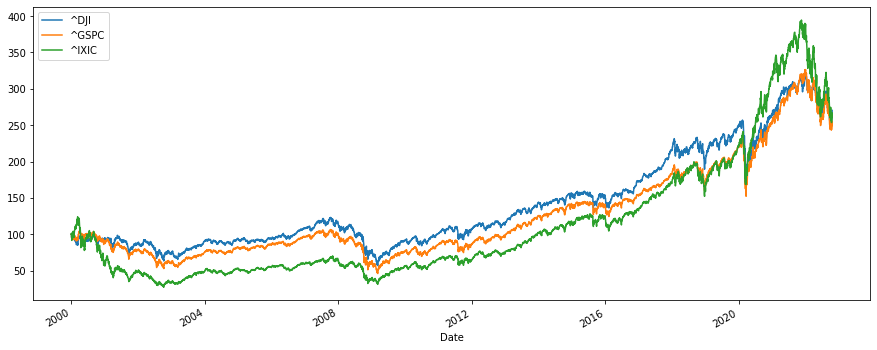

In [3]:
(data / data.iloc[0] * 100).plot(figsize=(15, 6))

How would you explain the common and the different parts of the behavior of the three indices?

*****

Obtain the simple returns of the indices.

In [4]:
returns = (data / data.shift(1)) - 1
returns

,^DJI,^GSPC,^IXIC
Date,,,
1999-12-31,NaN,NaN,NaN
2000-01-03,-0.012143,-0.009549,0.015197
2000-01-04,-0.031660,-0.038345,-0.055544
2000-01-05,0.011340,0.001922,-0.006190
2000-01-06,0.011743,0.000956,-0.038790
...,...,...,...
2022-10-17,0.018593,0.026480,0.034337
2022-10-18,0.011197,0.011428,0.009049
2022-10-19,-0.003276,-0.006672,-0.008530


Estimate the average annual return of each index.

In [5]:
annual_returns = returns.mean() * 250
annual_returns

^DJI     0.061147
^GSPC    0.060385
^IXIC    0.074797
dtype: float64